In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sns


%matplotlib inline
sns.set_style('whitegrid')

Importing **dataset** and preparing data

In [7]:
df = pd.read_excel('simulation_results.xlsx', sheet_name=0, header=0, index_col=False, keep_default_na=True)
# column names
print(df.columns.values)
#delete columns
#df.drop(columns=['Unnamed: 9'],inplace=True)
# delete nan rows
df = df.dropna()

# Replace values in a column
df["Model"].replace({"None": "REACTIVE"}, inplace=True)

df.head()

['File' 'Model' 'Time(s)' 'Days' 'Vm hours' 'Accepted' 'Rejected' 'Qos'
 'Status']


,File,Model,Time(s),Days,Vm hours,Accepted,Rejected,Qos,Status
0,"proactive_5_GRU,",ARIMA,300.0,7.0,594.83,338313.0,10709.0,3.07,Balanced
1,"proactive_5_arima,",GRU,300.0,7.0,598.00,336740.0,12282.0,3.52,None
2,"proactive_5_mlp,",MLP,300.0,7.0,601.25,336738.0,12284.0,3.52,None
3,"reactive_5,",REACTIVE,300.0,7.0,613.00,332624.0,16398.0,4.70,Unbalanced
5,"proactive_10_arima,",ARIMA,600.0,7.0,605.50,339589.0,9433.0,2.70,None


**Selecting balanced values**

In [8]:
df_balanced = df.loc[df['Status']=='Balanced']
df_unbalanced = df.loc[df['Status']=='Unbalanced']
#print(df_balanced.count())
#print(df_unbalanced.count())
df_balanced


,File,Model,Time(s),Days,Vm hours,Accepted,Rejected,Qos,Status
0,"proactive_5_GRU,",ARIMA,300.0,7.0,594.83,338313.0,10709.0,3.07,Balanced
7,"proactive_10_mlp,",MLP,600.0,7.0,605.00,339599.0,9423.0,2.70,Balanced
12,"proactive_15_mlp,",MLP,900.0,7.0,612.53,340285.0,8737.0,2.50,Balanced
16,"proactive_20_gru,",GRU,1200.0,7.0,633.07,341134.0,7888.0,2.26,Balanced
21,"proactive_25_gru,",GRU,1500.0,7.0,633.55,340743.0,8279.0,2.37,Balanced
26,"proactive_30_gru,",GRU,1800.0,7.0,655.45,342811.0,6211.0,1.78,Balanced
30,"proactive_35_arima,",ARIMA,2100.0,7.0,655.15,342933.0,6089.0,1.74,Balanced
35,"proactive_40_arima,",ARIMA,2400.0,7.0,656.10,343112.0,5910.0,1.69,Balanced
42,"proactive_45_mlp,",MLP,2700.0,7.0,662.37,342522.0,6500.0,1.86,Balanced
46,"proactive_50_gru,",GRU,3000.0,7.0,662.52,342133.0,6889.0,1.97,Balanced


In [9]:
df

,File,Model,Time(s),Days,Vm hours,Accepted,Rejected,Qos,Status
0,"proactive_5_GRU,",ARIMA,300.0,7.0,594.83,338313.0,10709.0,3.07,Balanced
1,"proactive_5_arima,",GRU,300.0,7.0,598.00,336740.0,12282.0,3.52,None
2,"proactive_5_mlp,",MLP,300.0,7.0,601.25,336738.0,12284.0,3.52,None
3,"reactive_5,",REACTIVE,300.0,7.0,613.00,332624.0,16398.0,4.70,Unbalanced
5,"proactive_10_arima,",ARIMA,600.0,7.0,605.50,339589.0,9433.0,2.70,None
6,"proactive_10_gru,",GRU,600.0,7.0,613.04,338971.0,10051.0,2.88,None
7,"proactive_10_mlp,",MLP,600.0,7.0,605.00,339599.0,9423.0,2.70,Balanced
8,"reactive_10,",REACTIVE,600.0,7.0,617.03,332713.0,16309.0,4.67,Unbalanced
10,"proactive_15_arima,",ARIMA,900.0,7.0,613.28,340357.0,8665.0,2.48,None
11,"proactive_15_gru,",GRU,900.0,7.0,612.52,339223.0,9799.0,2.81,None


**Scheduling time intervals x Vm Hours cost**

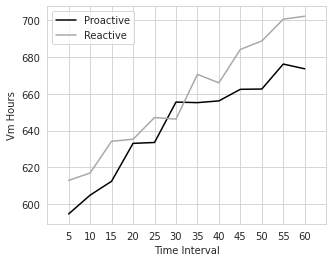

In [10]:
proactive = df_balanced['Vm hours']
reactive = df_unbalanced['Vm hours']
time = df_balanced['Time(s)']/60

# filtering data

fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(time,proactive,label = 'Proactive', color = 'k')
ax.plot(time,reactive, label = 'Reactive', color = 'darkgray')

ax.set_xlim(0, 65)
plt.xticks(time)
plt.xlabel('Time Interval')
plt.ylabel('Vm Hours')

plt.legend()
plt.savefig('1.pdf')
plt.show()

**SLA by time interval**

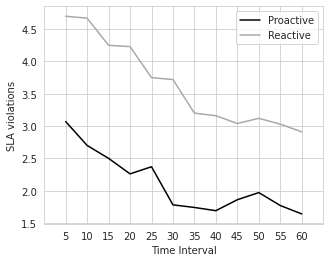

In [11]:
proactive = df_balanced['Qos']
reactive = df_unbalanced['Qos']
time = df_balanced['Time(s)']/60

fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(time,proactive,label = 'Proactive', color='k')
ax.plot(time,reactive, label = 'Reactive', color='darkgray')

ax.set_xlim(0, 65)
plt.xticks(time)
#plt.title('SLA violations by time interval')
plt.xlabel('Time Interval')
plt.ylabel('SLA violations')


plt.legend()
plt.savefig('2.pdf')
plt.show()

*Request processed by time interval *

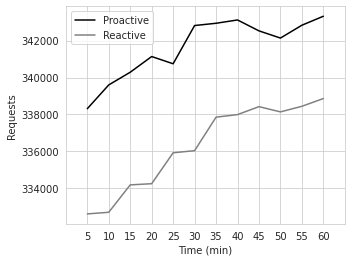

In [12]:
proactive = df_balanced['Accepted']
reactive = df_unbalanced['Accepted']
time = df_balanced['Time(s)']/60

fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(time,proactive,label = 'Proactive', color='k')
ax.plot(time,reactive, label = 'Reactive', color='gray')

ax.set_xlim(0, 65)
plt.xticks(time)
#plt.title('Request Processed by time interval')
plt.xlabel('Time (min)')
plt.ylabel('Requests')


plt.legend()
plt.savefig('3.pdf')
plt.show()

**Requests rejected by time interval**

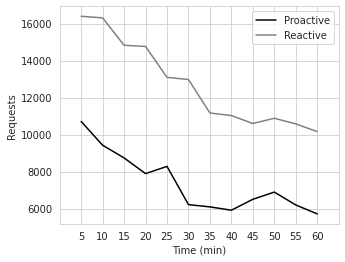

In [13]:
proactive = df_balanced['Rejected']
reactive = df_unbalanced['Rejected']
time = df_balanced['Time(s)']/60

fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(time,proactive,label = 'Proactive', color='k')
ax.plot(time,reactive, label = 'Reactive', color='gray')

ax.set_xlim(0, 65)
plt.xticks(time)
#plt.title('Requests rejected')
plt.xlabel('Time (min)')
plt.ylabel('Requests')

plt.legend()
plt.savefig('4.pdf')
plt.show()

Models comparison


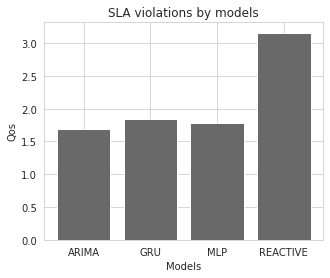

In [14]:

df_models = df.loc[df['Time(s)'] == 300]
fig, ax = plt.subplots(figsize=(5,4))

df_models = df.loc[df['Time(s)'] == 2400]
models = df_models['Model']
qos = df_models['Qos']

ax.bar(models,qos,label = 'SLA violations', color='dimgrey')

#ax.set_xlim(0, 65)
plt.xticks(models)
plt.title('SLA violations by models')
plt.xlabel('Models')
plt.ylabel('Qos')


#plt.legend()
plt.savefig('5.pdf')
plt.show()




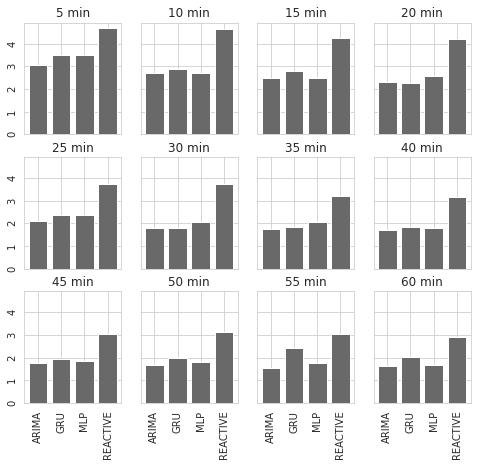

In [15]:
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
#df_models = df.loc[df['Time(s)'] == 300]

fig, subs = plt.subplots(3,4,sharex=True,sharey=True,figsize=(8,7))

#fig.suptitle('SLA violations by Model and interval times ')

df_models = df.loc[df['Time(s)'] == 300]
models = df_models['Model']
qos = df_models['Qos']
subs[0][0].bar(models,qos, color='dimgrey')
subs[0][0].set_title('5 min')

df_models = df.loc[df['Time(s)'] == 600]
models = df_models['Model']
qos = df_models['Qos']
subs[0][1].bar(models,qos, color='dimgrey')
subs[0][1].set_title('10 min')

df_models = df.loc[df['Time(s)'] == 900]
models = df_models['Model']
qos = df_models['Qos']
subs[0][2].bar(models, qos, color='dimgrey')
subs[0][2].set_title('15 min')

df_models = df.loc[df['Time(s)'] == 1200]
models = df_models['Model']
qos = df_models['Qos']
subs[0][3].bar(models,qos, color='dimgrey')
subs[0][3].set_title('20 min')


df_models = df.loc[df['Time(s)'] == 1500]
models = df_models['Model']
qos = df_models['Qos']
subs[1][0].bar(models,qos, color='dimgrey')
subs[1][0].set_title('25 min')


df_models = df.loc[df['Time(s)'] == 1800]
models = df_models['Model']
qos = df_models['Qos']
subs[1][1].bar(models,qos, color='dimgrey')
subs[1][1].set_title('30 min')


df_models = df.loc[df['Time(s)'] == 2100]
models = df_models['Model']
qos = df_models['Qos']
subs[1][2].bar(models,qos, color='dimgrey')
subs[1][2].set_title('35 min')


df_models = df.loc[df['Time(s)'] == 2400]
models = df_models['Model']
qos = df_models['Qos']
subs[1][3].bar(models,qos, color='dimgrey')
subs[1][3].set_title('40 min')


df_models = df.loc[df['Time(s)'] == 2700]
models = df_models['Model']
qos = df_models['Qos']
subs[2][0].bar(models,qos, color='dimgrey')
subs[2][0].set_title('45 min')

df_models = df.loc[df['Time(s)'] == 3000]
models = df_models['Model']
qos = df_models['Qos']
subs[2][1].bar(models,qos, color='dimgrey')
subs[2][1].set_title('50 min')


df_models = df.loc[df['Time(s)'] == 3300]
models = df_models['Model']
qos = df_models['Qos']
subs[2][2].bar(models,qos, color='dimgrey')
subs[2][2].set_title('55 min')


df_models = df.loc[df['Time(s)'] == 3600]
models = df_models['Model']
qos = df_models['Qos']
subs[2][3].bar(models,qos, color='dimgrey')
subs[2][3].set_title('60 min')


for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    
plt.savefig('6.pdf')
plt.show()
